# CARGA DE DATOS

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as sms
import statsmodels.formula.api as smf

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
df=pd.read_excel("/content/Base final casos 1 y 3.xlsx")
df.head(10)

,id_cliente,edad,sexo,parroquia,n_visitas,gasto_total,ultima_visita,recencia,retorno,inmunologicas,generales,citologia,especiales,medicina_ocup
0,666099193,22,Masculino,Machachi,2,106.0,2023-04-01,487,Si,No,Si,No,No,No
1,1000850949,69,Femenino,Guamani,1,137.0,2024-07-22,9,No,No,Si,No,Si,No
2,1001012838,70,Femenino,Machachi,3,58.0,2023-04-19,469,Si,No,Si,Si,No,No
3,1003432364,30,Masculino,Machachi,2,160.5,2024-04-18,104,Si,Si,Si,No,Si,No
4,1003979737,22,Femenino,Aloag,1,10.0,2023-12-03,241,No,No,Si,No,Si,No
5,1051122750,2,Femenino,NaN,1,6.0,2024-01-23,190,No,No,Si,No,No,No
6,1101046298,76,Femenino,Machachi,1,216.0,2024-01-15,198,No,No,Si,No,Si,No
7,1101823456,75,Femenino,Machachi,1,99.0,2023-05-01,457,No,No,Si,No,No,No
8,1102267554,75,Masculino,NaN,1,10.0,2023-12-09,235,No,No,Si,No,No,No
9,1103631014,45,Femenino,Machachi,1,60.0,2023-08-11,355,No,No,Si,No,No,No


# 7.2 LIMPIEZA Y PROCESAMIENTO

**DESCRIPCION DE VARIABLES**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2305 entries, 0 to 2304
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_cliente     2305 non-null   object        
 1   edad           2305 non-null   int64         
 2   sexo           2305 non-null   object        
 3   parroquia      2134 non-null   object        
 4   n_visitas      2305 non-null   int64         
 5   gasto_total    2305 non-null   float64       
 6   ultima_visita  2305 non-null   datetime64[ns]
 7   recencia       2305 non-null   int64         
 8   retorno        2305 non-null   object        
 9   inmunologicas  2305 non-null   object        
 10  generales      2305 non-null   object        
 11  citologia      2305 non-null   object        
 12  especiales     2305 non-null   object        
 13  medicina_ocup  2305 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(9)
memory usage: 252.

Numéricas

In [ ]:
df.describe(include=[np.number])

,edad,n_visitas,gasto_total,recencia
count,2305.000000,2305.000000,2305.000000,2305.000000
mean,37.958785,1.434707,51.904861,269.760521
std,22.824579,1.113448,64.215931,169.966377
min,1.000000,1.000000,1.000000,0.000000
25%,21.000000,1.000000,13.000000,124.000000
50%,35.000000,1.000000,30.000000,251.000000
75%,54.000000,1.000000,65.000000,421.000000
max,103.000000,25.000000,739.000000,577.000000


Categóricas

In [ ]:
df.describe(include='object')

,id_cliente,sexo,parroquia,retorno,inmunologicas,generales,citologia,especiales,medicina_ocup
count,2305,2305,2134,2305,2305,2305,2305,2305,2305
unique,2305,2,14,2,2,2,2,2,2
top,666099193,Femenino,Machachi,No,No,Si,No,No,No
freq,1,1469,1400,1734,1896,2299,2054,1571,2261


**Seleccionar variables**

In [ ]:
# Seleccionar solo las columnas relevantes
df_cleaned = df[['edad', 'sexo', 'n_visitas', 'gasto_total' ,  'recencia', 'retorno']]

# Convertir las variables categóricas a numéricas
df_cleaned['sexo'] = df_cleaned['sexo'].map({'Masculino': 1, 'Femenino': 0})
df_cleaned['retorno'] = df_cleaned['retorno'].map({'Si': 1, 'No': 0})

# Revisar que las conversiones y limpieza se hayan aplicado correctamente
df_cleaned.head()


,edad,sexo,n_visitas,gasto_total,recencia,retorno
0,22,1,2,106.0,487,1
1,69,0,1,137.0,9,0
2,70,0,3,58.0,469,1
3,30,1,2,160.5,104,1
4,22,0,1,10.0,241,0


Aquí:

Seleccionamos las columnas clave para el modelo (edad, sexo, provincia, n_visitas, retorno).
Eliminamos filas con valores nulos.
Convertimos las variables categóricas sexo y retorno a valores binarios (1 y 0).

**DUPLICADOS**

In [ ]:
# Verificar duplicados en el DataFrame
duplicados = df[df.duplicated(keep=False)]

# Imprimir los duplicados (si los hay)
if not duplicados.empty:
  print("Se encontraron duplicados:")
  print(duplicados)
else:
  print("No se encontraron duplicados en el DataFrame.")

# Eliminar duplicados (si se desea)
# df_cleaned = df_cleaned.drop_duplicates()

No se encontraron duplicados en el DataFrame.


**DATOS PERDIDOS**

In [ ]:
df_cleaned.isnull().sum()

,0
edad,0
sexo,0
n_visitas,0
gasto_total,0
recencia,0
retorno,0


**DATOS ATÍPICOS (OUTLIERS)**

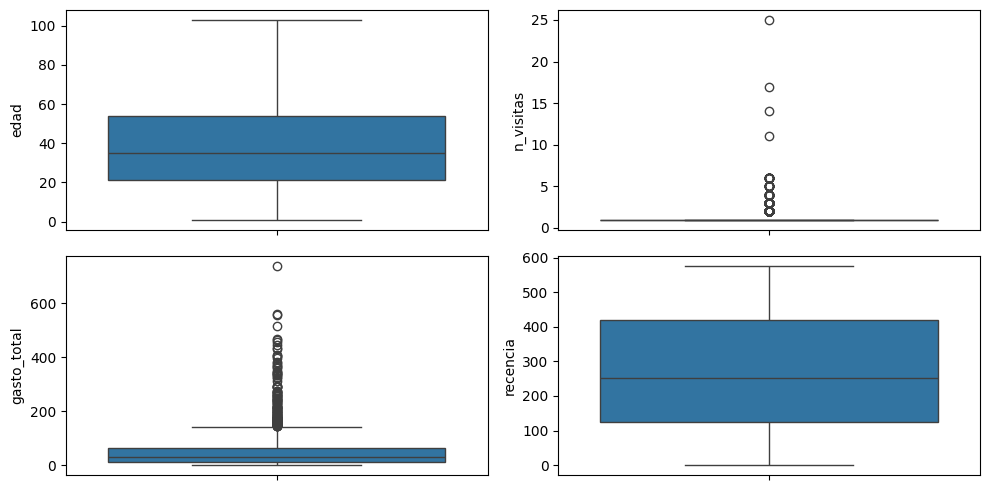

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(df_cleaned['edad'], ax = axs[0,0])
plt2 = sns.boxplot(df_cleaned['n_visitas'], ax = axs[0,1])
plt1 = sns.boxplot(df_cleaned['gasto_total'], ax = axs[1,0])
plt2 = sns.boxplot(df_cleaned['recencia'], ax = axs[1,1])
plt.tight_layout()

In [ ]:
# Imputar valores cercanos al límite superior del IQR

Q1_gasto_total = df_cleaned['gasto_total'].quantile(0.25)
Q3_gasto_total = df_cleaned['gasto_total'].quantile(0.75)
IQR_gasto_total = Q3_gasto_total - Q1_gasto_total

# Definir el límite superior del IQR
upper_limit_gasto_total = Q3_gasto_total + 1.5 * IQR_gasto_total

# Imputar valores cercanos al límite superior del IQR
df_cleaned['gasto_total'] = np.where(df_cleaned['gasto_total'] > upper_limit_gasto_total, upper_limit_gasto_total - 1, df_cleaned['gasto_total'])


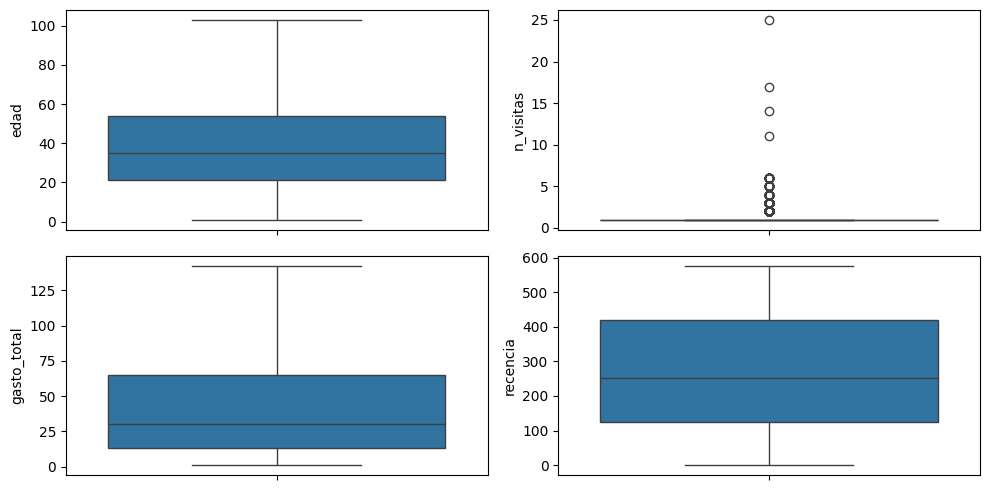

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(df_cleaned['edad'], ax = axs[0,0])
plt2 = sns.boxplot(df_cleaned['n_visitas'], ax = axs[0,1])
plt1 = sns.boxplot(df_cleaned['gasto_total'], ax = axs[1,0])
plt2 = sns.boxplot(df_cleaned['recencia'], ax = axs[1,1])
plt.tight_layout()

# 7.3 IDENTIFICACION Y DESCRIPCION DE VARIABLES

In [ ]:
# Variables numéricas incluidas las transformadas
numerical_vars = ['edad', 'gasto_total', 'n_visitas', 'recencia', 'retorno']
correlation_matrix = df_cleaned[numerical_vars].corr()
correlation_matrix

,edad,gasto_total,n_visitas,recencia,retorno
edad,1.000000,0.236046,0.165699,-0.042472,0.132628
gasto_total,0.236046,1.000000,0.453681,-0.182270,0.476241
n_visitas,0.165699,0.453681,1.000000,-0.233510,0.680499
recencia,-0.042472,-0.182270,-0.233510,1.000000,-0.259258
retorno,0.132628,0.476241,0.680499,-0.259258,1.000000


In [ ]:
correlation_matrix.style.background_gradient(cmap='coolwarm')

,edad,gasto_total,n_visitas,recencia,retorno
edad,1.000000,0.236046,0.165699,-0.042472,0.132628
gasto_total,0.236046,1.000000,0.453681,-0.182270,0.476241
n_visitas,0.165699,0.453681,1.000000,-0.233510,0.680499
recencia,-0.042472,-0.182270,-0.233510,1.000000,-0.259258
retorno,0.132628,0.476241,0.680499,-0.259258,1.000000


# 7.4 VISUALIZACION DE VARIABLES

**DISTRIBUCIONES DE LAS VARIABLES**

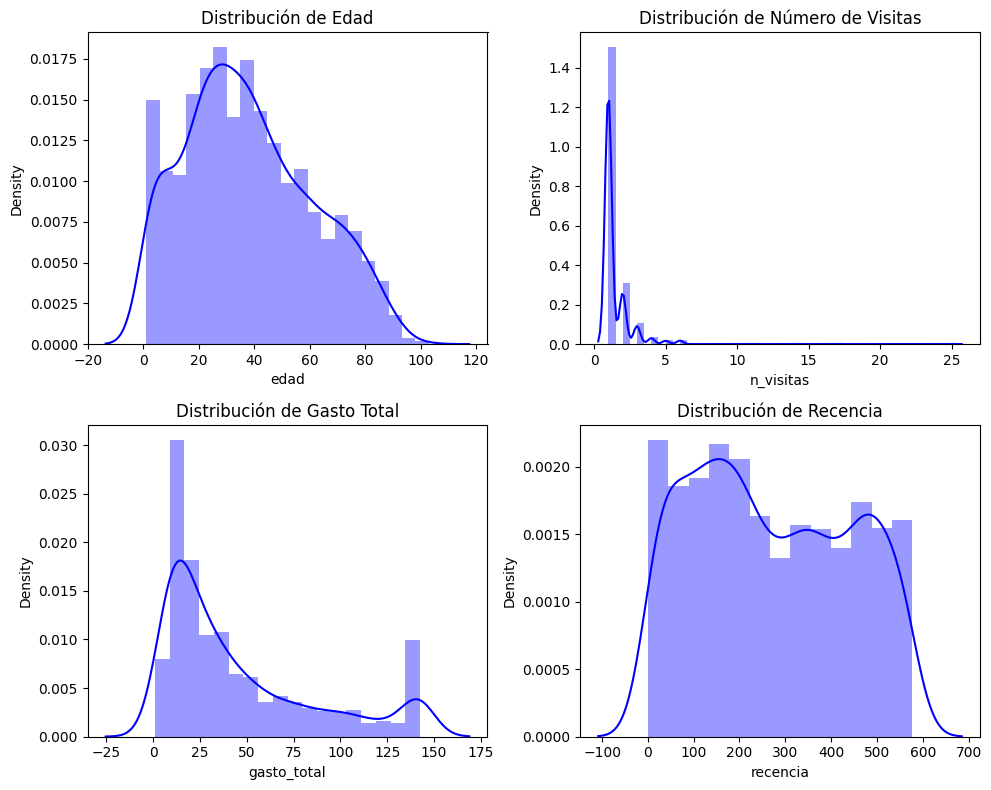

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.distplot(df_cleaned['edad'], ax=axs[0, 0], kde=True, color="blue")
axs[0, 0].set_title('Distribución de Edad')

sns.distplot(df_cleaned['n_visitas'], ax=axs[0, 1], kde=True, color="blue")
axs[0, 1].set_title('Distribución de Número de Visitas')

sns.distplot(df_cleaned['gasto_total'], ax=axs[1, 0], kde=True, color="blue")
axs[1, 0].set_title('Distribución de Gasto Total')

sns.distplot(df_cleaned['recencia'], ax=axs[1, 1], kde=True, color="blue")
axs[1, 1].set_title('Distribución de Recencia')

plt.tight_layout()
plt.show()

# 8.REGRESION LINEAL

Aquí se desarrolla el modelo de varias formas para observar los mejores resultados

# 8.1 NORMALIZAR LOS DATOS SIN TRANSFORMACIÓN LOGARTIMICA

In [ ]:
# Normalizar los datos numéricos (excepto la variable 'retorno')
numerical_features = ['edad', 'gasto_total', 'n_visitas', 'recencia']
scaler = StandardScaler()
df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])

# Separar el conjunto de datos en entrenamiento y prueba
X = df_cleaned[['edad', 'gasto_total', 'n_visitas', 'recencia', 'sexo']]
y = df_cleaned['retorno']

# Dividir los datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Evaluar el modelo en los datos de prueba
y_pred = result.predict(X_test)
y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]

# Mostrar métricas de rendimiento
print("Accuracy del modelo:", accuracy_score(y_test, y_pred_class))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_class))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_class))

         Current function value: 0.000000
         Iterations: 35
Accuracy del modelo: 1.0
Matriz de confusión:
 [[338   0]
 [  0 123]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       338
           1       1.00      1.00      1.00       123

    accuracy                           1.00       461
   macro avg       1.00      1.00      1.00       461
weighted avg       1.00      1.00      1.00       461



/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/usr/local/lib/python3.10/dist-packa

In [ ]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                retorno   No. Observations:                 1844
Model:                          Logit   Df Residuals:                     1839
Method:                           MLE   Df Model:                            4
Date:                Wed, 30 Oct 2024   Pseudo R-squ.:                   1.000
Time:                        12:14:26   Log-Likelihood:            -7.7133e-07
converged:                      False   LL-Null:                       -1022.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
edad            0.8304   1157.921      0.001      0.999   -2268.653    2270.314
gasto_total    -0.0822   1404.238  -5.85e-05      1.000   -2752.338    2752.174
n_visitas      56.4356   5970.280      0.009    

In [ ]:
# Calcular los odds ratios y sus intervalos de confianza
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

             2.5%  97.5%            OR
edad          0.0    inf  2.294260e+00
gasto_total   0.0    inf  9.211155e-01
n_visitas     0.0    inf  3.233352e+24
recencia      0.0    inf  3.247272e+00
sexo          0.0    inf  7.587708e-02


# 8.2 TRANSFORMACIÓN LOGARITMICA DE GASTO TOTAL

In [ ]:
# Aplicar la transformación logarítmica
df_cleaned['gasto_total_log'] = df_cleaned['gasto_total'].apply(lambda x: np.log(x + 1))  # evitar log(0)


In [ ]:
from sklearn.model_selection import train_test_split

# Separar el conjunto de datos en entrenamiento y prueba
X = df_cleaned[['edad', 'gasto_total_log', 'n_visitas', 'recencia', 'sexo']]
y = df_cleaned['retorno']

# Dividir los datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo con los datos de entrenamiento
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Evaluar el modelo en los datos de prueba
y_pred = result.predict(X_test)
y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]

# Mostrar métricas de rendimiento
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy del modelo:", accuracy_score(y_test, y_pred_class))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_class))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred_class))


Optimization terminated successfully.
         Current function value: 0.156543
         Iterations 10
Accuracy del modelo: 0.9392624728850325
Matriz de confusión:
 [[321  17]
 [ 11 112]]
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       338
           1       0.87      0.91      0.89       123

    accuracy                           0.94       461
   macro avg       0.92      0.93      0.92       461
weighted avg       0.94      0.94      0.94       461



In [ ]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                retorno   No. Observations:                 1844
Model:                          Logit   Df Residuals:                     1839
Method:                           MLE   Df Model:                            4
Date:                Wed, 30 Oct 2024   Pseudo R-squ.:                  0.7177
Time:                        12:00:44   Log-Likelihood:                -288.67
converged:                       True   LL-Null:                       -1022.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
edad               -0.0360      0.005     -6.818      0.000      -0.046      -0.026
gasto_total_log    -3.7213      0.279    -13.347      0.000      -4.268      -3.175
n_visitas          10.8782      

In [ ]:
# Calcular los odds ratios y sus intervalos de confianza
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

# Interpretación de los Odds Ratios:
# - Para cada variable independiente, un OR > 1 indica que un aumento de una unidad en esa variable aumenta las probabilidades de que el individuo sea un cliente recurrente.
# - Para cada variable independiente, un OR < 1 indica que un aumento de una unidad en esa variable disminuye las probabilidades de que el individuo sea un cliente recurrente.

# Ejemplo de interpretación:
# Si el OR para n_visitas es 2, significa que por cada visita adicional, las probabilidades de que un individuo sea recurrente se duplican, manteniendo constantes todas las demás variables.

                         2.5%          97.5%            OR
edad                 0.954722       0.974683      0.964651
gasto_total_log      0.014014       0.041801      0.024203
n_visitas        12517.701151  224487.866227  53010.112445
recencia             0.988328       0.991504      0.989915
sexo                 0.478600       1.231249      0.767643


# **10.	SUPUESTOS DE LA REGRESIÓN LOGISTICA**

**10.1	Variable dependiente categórica binaria**

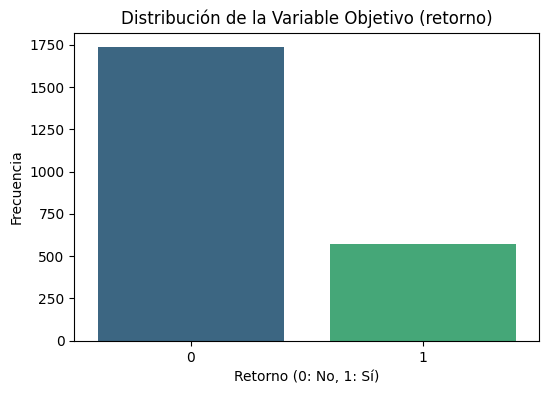

In [ ]:
# Visualizar la distribución de la variable objetivo
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='retorno', palette='viridis')
plt.title('Distribución de la Variable Objetivo (retorno)')
plt.xlabel('Retorno (0: No, 1: Sí)')
plt.ylabel('Frecuencia')
plt.show()

**10.2	Relación lineal entre el logaritmo natural de odds y la variable continua**

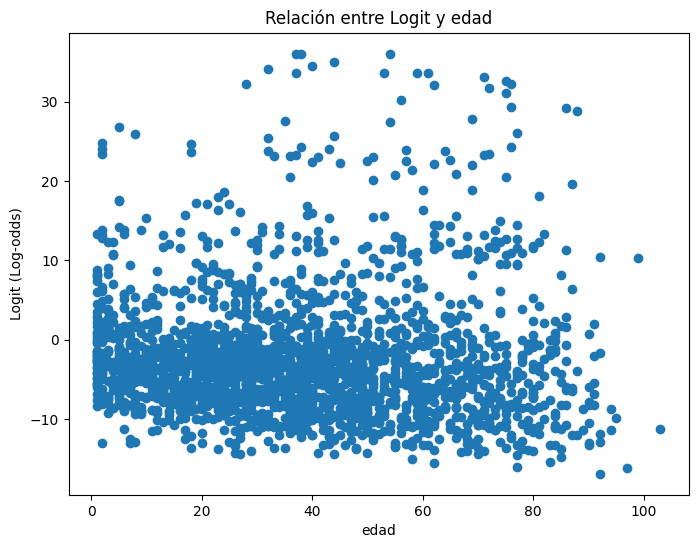

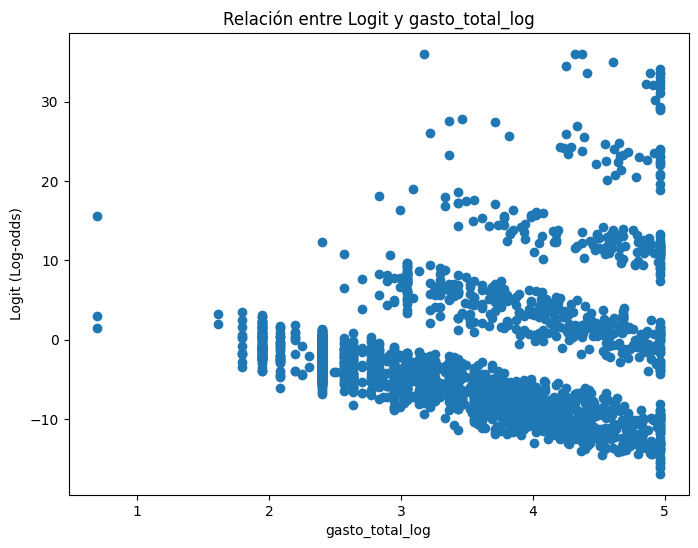

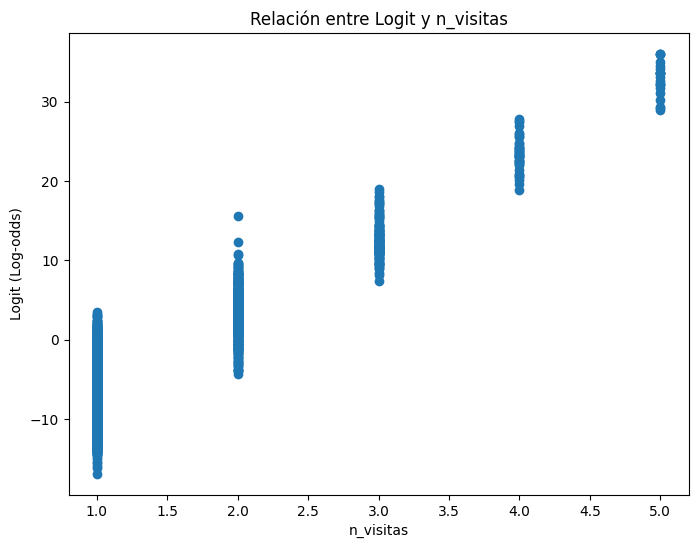

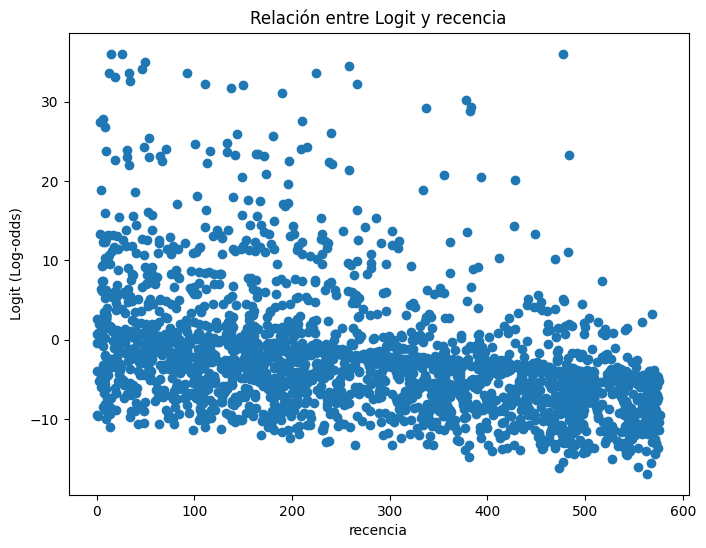

In [ ]:
# prompt: Relación lineal entre el logaritmo natural de odds y la variable continua

# Visualizar la relación lineal entre el logaritmo natural de odds y las variables continuas
for var in ['edad', 'gasto_total_log', 'n_visitas', 'recencia']:
  plt.figure(figsize=(8, 6))
  plt.scatter(df_cleaned[var], np.log(result.predict(X) / (1 - result.predict(X))))
  plt.xlabel(var)
  plt.ylabel('Logit (Log-odds)')
  plt.title(f'Relación entre Logit y {var}')
  plt.show()

**10.3	No colinealidad perfecta entre las covariables**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
var_predictoras=['edad', 'gasto_total_log', 'n_visitas', 'recencia','sexo']

In [ ]:
# Calcula el VIF para cada variable predictora
vif = pd.DataFrame()
vif["Variable"] = var_predictoras
vif["VIF"] = [variance_inflation_factor(df_cleaned[var_predictoras].values, i) for i in range(df_cleaned[var_predictoras].shape[1])]

# Muestra los resultados
print(vif)

          Variable       VIF
0             edad  3.851873
1  gasto_total_log  8.279759
2        n_visitas  3.310491
3         recencia  2.875580
4             sexo  1.603956


**10.4	Grandes tamaños de muestra**

In [ ]:
# Verificar el tamaño de la muestra para asegurar la validez de los resultados
print("Tamaño de la muestra:", len(df_cleaned))

# Si el tamaño de la muestra es lo suficientemente grande, se puede confiar en los resultados del modelo.
# Una regla general es que un tamaño de muestra de al menos 30 es considerado grande para la mayoría de los estudios.
# En este caso, el tamaño de la muestra es considerablemente mayor.

Tamaño de la muestra: 2305
